In [ ]:
import warnings
warnings.filterwarnings("ignore")
!pip install scikit-optimize
!pip install geneticalgorithm
!pip install hyperopt
!pip install pandas openpyxl


import os
import nltk
import skopt
import random
import numpy as np
import pandas as pd
import xgboost as xgb
import xgboost as xgb

xgb_model = xgb.XGBClassifier(enable_categorical=True)

import geneticalgorithm
from sklearn.svm import SVC
from itertools import product
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from nltk.corpus import stopwords
from hyperopt import fmin, tpe, hp
from nltk.stem import WordNetLemmatizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from skopt.space import Real, Integer, Categorical
from sklearn.linear_model import LogisticRegression
from geneticalgorithm import geneticalgorithm as ga
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15076 sha256=77663ef496ae523d0f13b269c81f2c3eee53f22929e7c2f3ec0c68ab36b110ec
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

test_A= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle project/test_A_derma.csv')
train_A= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle project/train_A_derma.csv')

Mounted at /content/drive


In [ ]:
print(train_A)
print(test_A)

      Id  Lession  Genetic Propensity  Skin X test  Skin color  Small size  \
0      0      1.0            -1.27713          4.0         NaN         0.0   
1      1      NaN            -1.84207          3.0         0.0         1.0   
2      2      NaN            -1.82290          3.0         NaN         0.0   
3      3      1.0            -1.36049          3.0         NaN         1.0   
4      4      NaN                 NaN          2.0         0.0         0.0   
..   ...      ...                 ...          ...         ...         ...   
592  592      NaN            -2.16422          NaN         1.0         0.0   
593  593      0.0                 NaN          3.0         1.0         1.0   
594  594      0.0            -1.03834          NaN         0.0         0.0   
595  595      0.0                 NaN          NaN         1.0         1.0   
596  596      0.0            -2.16422          2.0         1.0         0.0   

     Mid size  Large size  Mid  Small  Large  Doughnuts consump

In [ ]:
print('Nan Value Counts for Training Dataset')
print(train_A.isna().sum())

print('\nNan Value Counts for Test Dataset')
print(test_A.isna().sum())

Nan Value Counts for Training Dataset
Id                         0
Lession                  190
Genetic Propensity       194
Skin X test              175
Skin color               177
Small size               184
Mid size                 173
Large size               180
Mid                      175
Small                    184
Large                    190
Doughnuts consumption      0
Fake/Real                  0
dtype: int64

Nan Value Counts for Test Dataset
Id                        0
Lession                  80
Genetic Propensity       85
Skin X test              67
Skin color               76
Small size               75
Mid size                 80
Large size               78
Mid                      82
Small                    76
Large                    80
Doughnuts consumption     0
dtype: int64


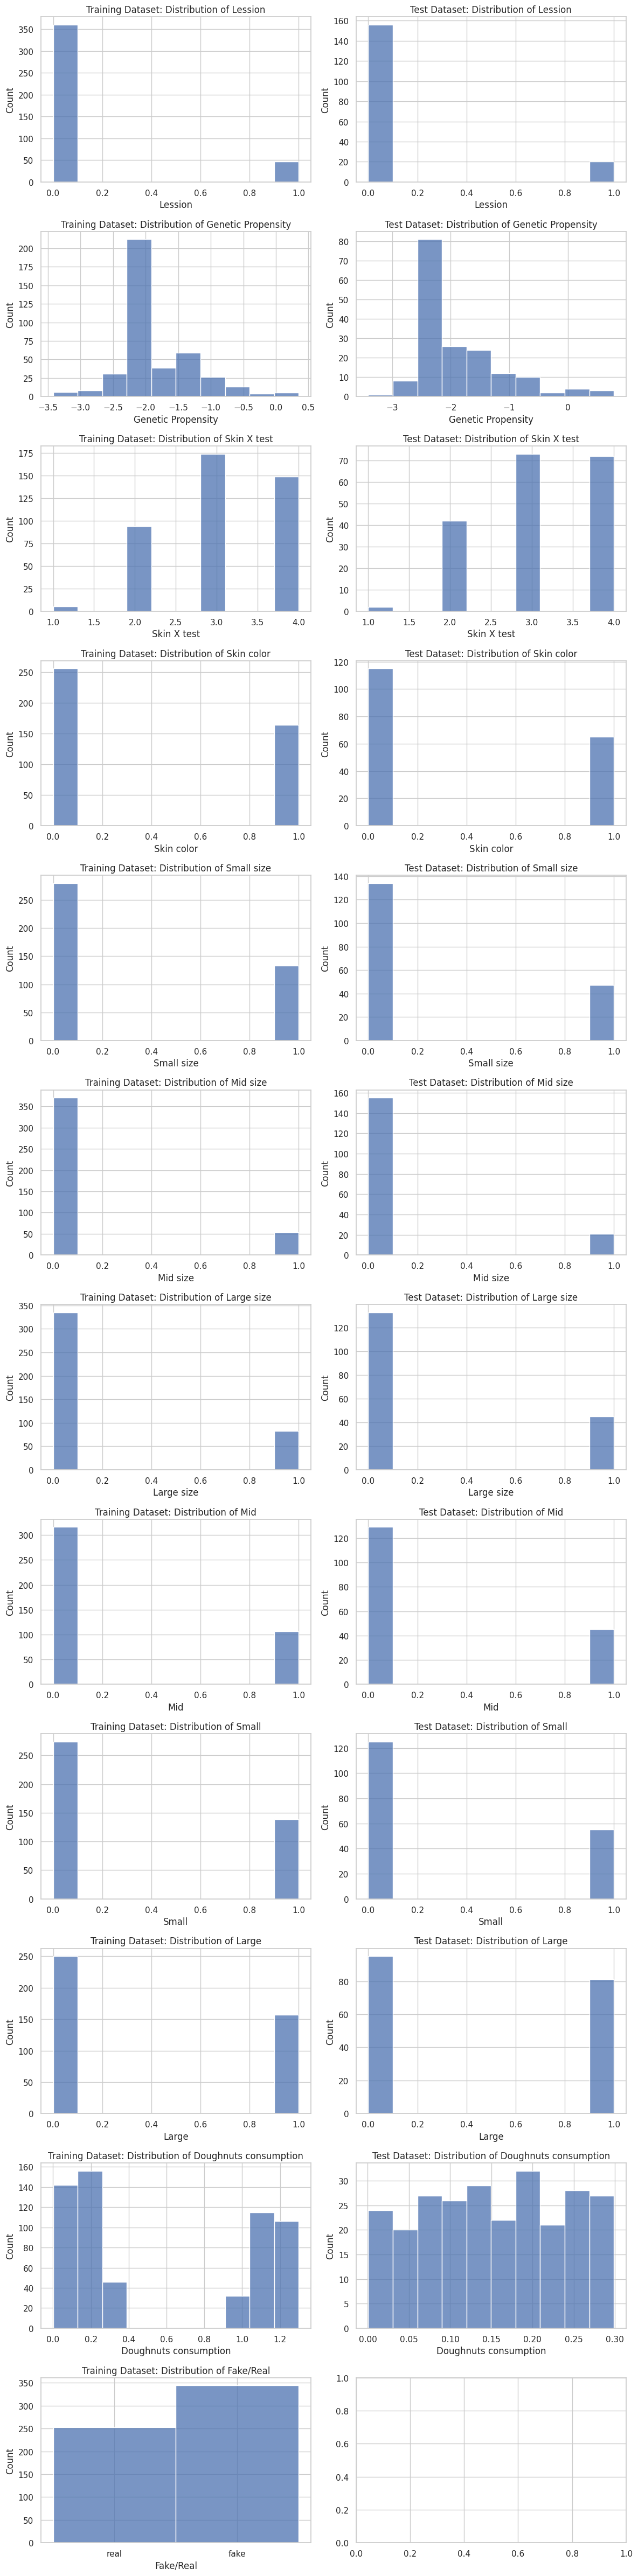

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrames
datasetA = pd.DataFrame(train_A)
testDatasetA = pd.DataFrame(test_A)

datasetA.drop(columns=['Id'], inplace=True)
testDatasetA.drop(columns=['Id'], inplace=True)

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure with subplots (2 columns)
num_cols = len(datasetA.columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 4 * num_cols))

# Loop through each column in the training dataset
for i, column in enumerate(datasetA.columns):
    sns.histplot(datasetA[column], bins=10, kde=False, ax=axes[i, 0])
    axes[i, 0].set_title(f'Training Dataset: Distribution of {column}')

# Loop through each column in the test dataset
for i, column in enumerate(testDatasetA.columns):
    sns.histplot(testDatasetA[column], bins=10, kde=False, ax=axes[i, 1])
    axes[i, 1].set_title(f'Test Dataset: Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


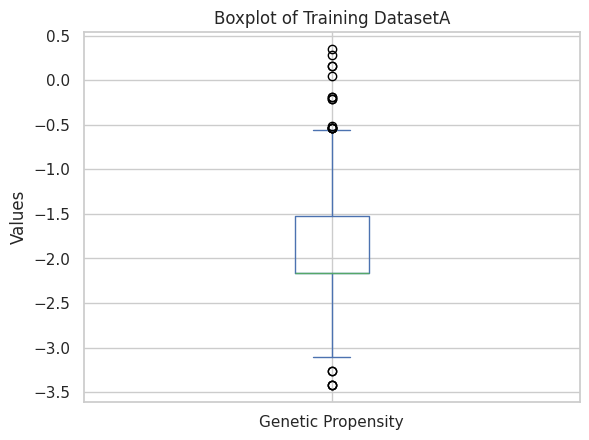

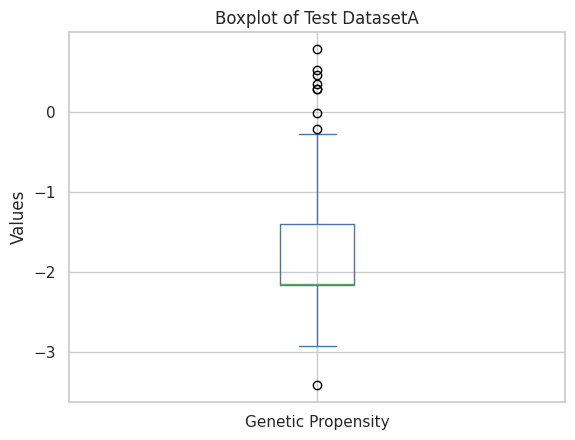

In [ ]:
import matplotlib.pyplot as plt

#Lets check if we have outliers in the numericakl column Genetic Propensity	using Boxplot

datasetA['Genetic Propensity'].plot(kind='box')
plt.title('Boxplot of Training DatasetA')
plt.ylabel('Values')
plt.show()

import matplotlib.pyplot as plt

#Lets check if we have outliers in the numerical column Genetic Propensity	using Boxplot for the Test Dataset

testDatasetA['Genetic Propensity'].plot(kind='box')
plt.title('Boxplot of Test DatasetA')
plt.ylabel('Values')
plt.show()

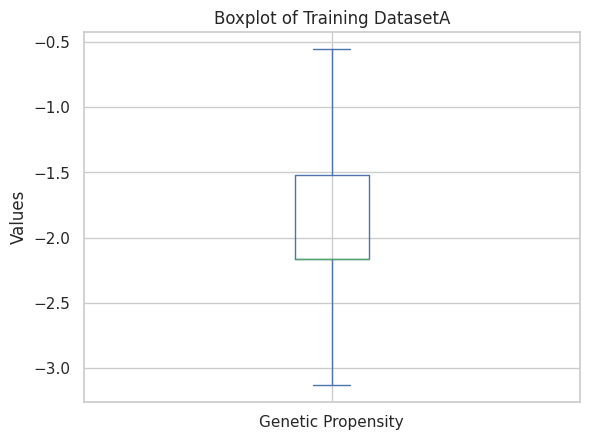

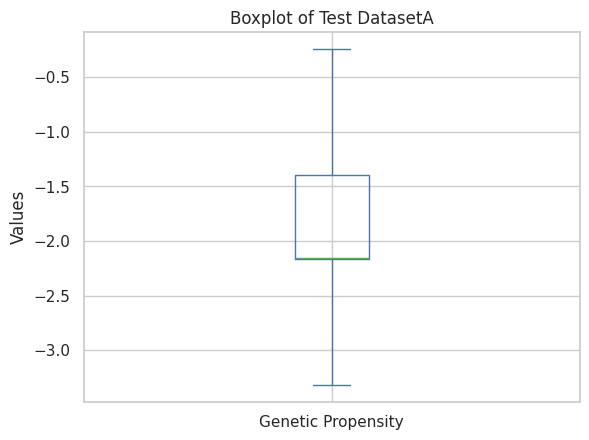

In [ ]:
# Removing Outliers

# Calculate Q1 and Q3
Q1 = datasetA['Genetic Propensity'].quantile(0.25)  # 25th percentile
Q3 = datasetA['Genetic Propensity'].quantile(0.75)  # 75th percentile

# Calculate IQR
IQR = Q3 - Q1

datasetA['Genetic Propensity'] = datasetA['Genetic Propensity'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)


datasetA['Genetic Propensity'].plot(kind='box')
plt.title('Boxplot of Training DatasetA')
plt.ylabel('Values')
plt.show()

# Removing Outliers fot Test Dataset
# Calculate Q1 and Q3
Q1 = testDatasetA['Genetic Propensity'].quantile(0.25)  # 25th percentile
Q3 = testDatasetA['Genetic Propensity'].quantile(0.75)  # 75th percentile

# Calculate IQR
IQR = Q3 - Q1

testDatasetA['Genetic Propensity'] = testDatasetA['Genetic Propensity'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)


testDatasetA['Genetic Propensity'].plot(kind='box')
plt.title('Boxplot of Test DatasetA')
plt.ylabel('Values')
plt.show()

In [ ]:
# Remove lines with 5 or more NaN values

datasetA = datasetA.dropna(thresh=len(datasetA.columns) - 5)

We saw the there is patern between some columns of the data so we decide to fill the NaN values for these columns following this patern. For the columns Small, Mid , Large there is only one 1 in every row and the same happens for Small Size, Mid Size, Large Size so we used the same function for them as well.

In [ ]:
def handle_nan_values_using_pattern(df, columns):

    for index, row in df.iterrows():
        has_one = (row[columns] == 1).any()    #check if there appears one 1 in this row
        nan_count = row[columns].isna().sum()  #coubt the number of NaNs in this row

        if nan_count == 3:
            # If all three values are NaN, set one to 1 randomly
            r = np.random.choice(columns)
            df.at[index, r] = 1

        elif nan_count == 2 and not has_one:
            # If two NaNs and no 1s, randomly choose one of the NaNs to be 1
            nan_cols = row[columns][row[columns].isna()].index
            r = np.random.choice(nan_cols)
            df.at[index, r] = 1

        elif nan_count == 1 and not has_one:
            # If one NaN and no 1s, set the NaN to 1
            nan_index = row[columns].isna().idxmax()  # Get the index of the NaN
            df.at[index, nan_index] = 1  # Set that NaN to 1

        # Set all remaining NaNs to 0, covers also the case where there appears one 1 in this row, it will fill the remain NaNs with 0
        for col in columns:
            if pd.isna(row[col]):
                df.at[index, col] = 0

columnsToChange1 = ['Small size', 'Mid size', 'Large size']
columnsToChange2 = ['Small', 'Mid', 'Large']

handle_nan_values_using_pattern(datasetA, columnsToChange1)
handle_nan_values_using_pattern(datasetA, columnsToChange2)


handle_nan_values_using_pattern(testDatasetA, columnsToChange1)
handle_nan_values_using_pattern(testDatasetA, columnsToChange2)


In [ ]:
#This column has a few values for the category 1 so we will change them to category 2 in order to have less categories
datasetA['Skin X test'] = datasetA['Skin X test'].replace({1: 2})
testDatasetA['Skin X test'] = testDatasetA['Skin X test'].replace({1: 2})


In [ ]:
# Impute missing values in numeric columns with the median
datasetA['Genetic Propensity'] = datasetA['Genetic Propensity'].fillna(datasetA[column].median())
testDatasetA['Genetic Propensity'] = testDatasetA['Genetic Propensity'].fillna(testDatasetA[column].median())

random_impute_columns = ['Lession', 'Skin X test', 'Skin color', 'Small size',
                    'Mid size', 'Large size', 'Mid', 'Small', 'Large', 'Doughnuts consumption']

# Function to impute missing values with random sampling
def impute_categorical_randomly(df, columns):
    for column in columns:
        # Extract non-NaN values from the column
        non_nan_values = df[column].dropna().tolist()
        # Apply random replacement for NaNs
        df[column] = df[column].apply(lambda x: random.choice(non_nan_values) if pd.isnull(x) else x)

# Perform the imputation
impute_categorical_randomly(datasetA, random_impute_columns)
impute_categorical_randomly(testDatasetA, random_impute_columns)

# Check if there are still missing values
print(datasetA.isna().sum())
print(testDatasetA.isna().sum())

Lession                  0
Genetic Propensity       0
Skin X test              0
Skin color               0
Small size               0
Mid size                 0
Large size               0
Mid                      0
Small                    0
Large                    0
Doughnuts consumption    0
Fake/Real                0
dtype: int64
Lession                  0
Genetic Propensity       0
Skin X test              0
Skin color               0
Small size               0
Mid size                 0
Large size               0
Mid                      0
Small                    0
Large                    0
Doughnuts consumption    0
dtype: int64


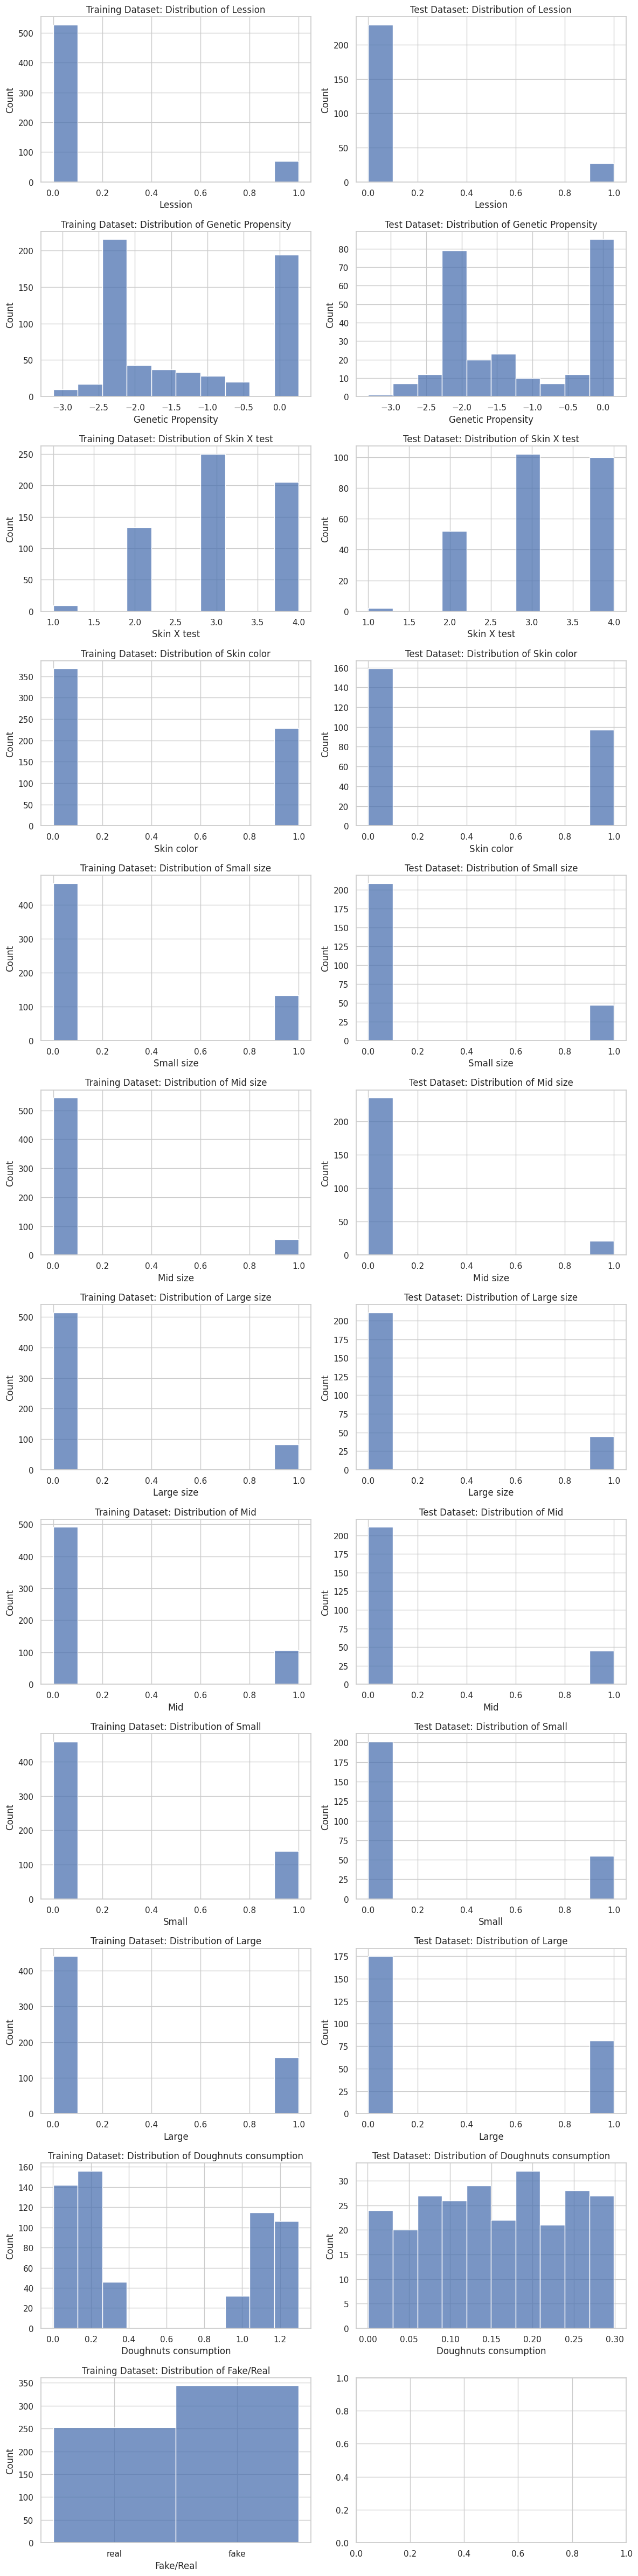

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure with subplots
num_cols = len(datasetA.columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 4 * num_cols))

# Loop through each column in the training dataset
for i, column in enumerate(datasetA.columns):
    sns.histplot(datasetA[column], bins=10, kde=False, ax=axes[i, 0])
    axes[i, 0].set_title(f'Training Dataset: Distribution of {column}')

# Loop through each column in the test dataset
for i, column in enumerate(testDatasetA.columns):
    sns.histplot(testDatasetA[column], bins=10, kde=False, ax=axes[i, 1])
    axes[i, 1].set_title(f'Test Dataset: Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Label encoding for the target variable
label_encoding = {'fake': 0, 'real': 1}
datasetA['Label'] = datasetA['Fake/Real'].map(label_encoding)

datasetA = datasetA.drop(columns=['Fake/Real'])


In [ ]:
datasetA.isna().sum()

,0
Lession,0
Genetic Propensity,0
Skin X test,0
Skin color,0
Small size,0
Mid size,0
Large size,0
Mid,0
Small,0
Large,0


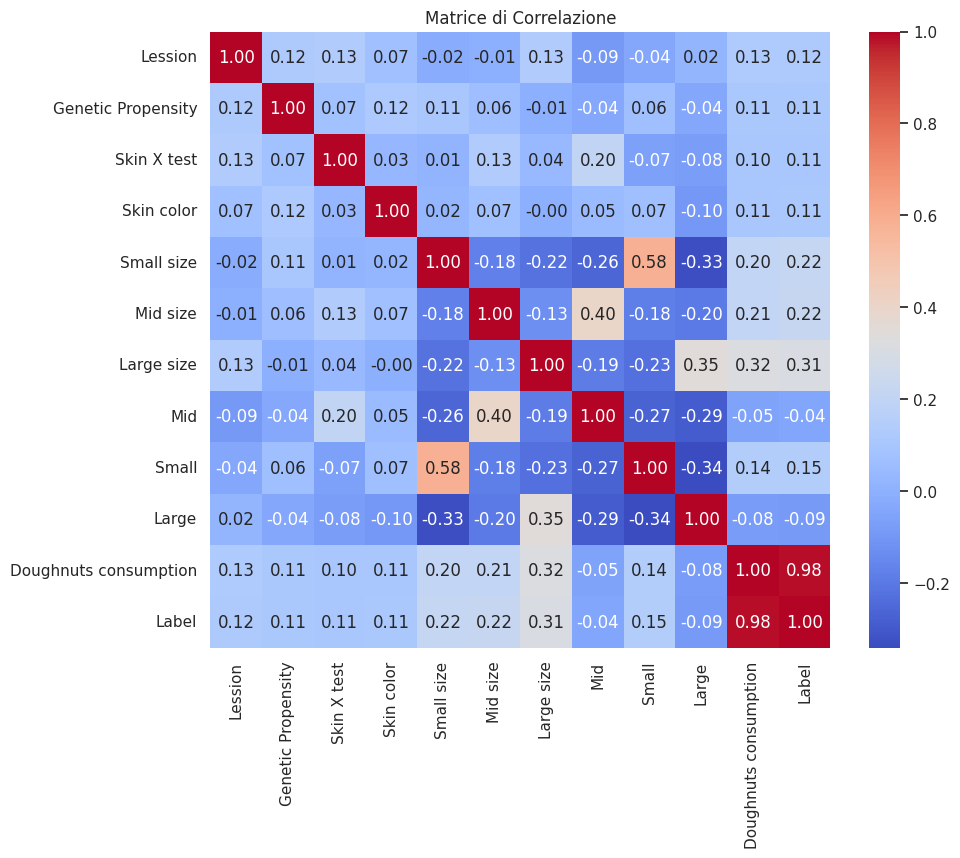

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# print the correlation matrix
correlation_matrix = datasetA.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di Correlazione')
plt.show()

Due to the hight correlation between doughnuts consuption and the target, we proceded to drop the column Doughnuts consumption

In [ ]:
datasetA.drop(columns=['Doughnuts consumption'], inplace=True)
testDatasetA.drop(columns=['Doughnuts consumption'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Fake/Real' is the target column
X = datasetA.drop(columns=['Label'])  # Features
y = datasetA['Label']                  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Show the sizes of the datasets
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")


Training set size: 456 rows
Test set size: 114 rows


In [ ]:
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, BaggingClassifier)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd



# Define the classifiers to test
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    LogisticRegression(max_iter=1000),  # Increase max_iter for convergence
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),  # Increase max_iter for convergence
    AdaBoostClassifier()
]

# Define the regularization methods (applicable only to certain classifiers)
reg_methods = [
    None,  # No regularization
    Ridge(alpha=0.001),
    Lasso(alpha=0.001),
    ElasticNet(alpha=0.001)
]

# Define the cross-validation techniques
cv_methods = [
    None,  # No cross-validation
    KFold(n_splits=5, shuffle=True, random_state=42),  # K-fold cross-validation
    StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Stratified K-fold cross-validation
]

# Initialize variables to track the best model and its accuracy
best_model = None
best_reg = None
best_cv = None
best_accuracy = 0.0

# Iterate over classifiers, regularization methods, and cross-validation techniques
for classifier in classifiers:
    classifier_name = type(classifier).__name__

    for reg_method in reg_methods:
        reg_name = "None" if reg_method is None else type(reg_method).__name__

        for cv_method in cv_methods:
            cv_name = "None" if cv_method is None else type(cv_method).__name__

            # Train and evaluate the classifier with the specified settings
            if cv_method:
                scores = cross_val_score(classifier, X_train, y_train, cv=cv_method, scoring='accuracy')
                accuracy = scores.mean()
            else:
                classifier.fit(X_train, y_train)
                y_pred = classifier.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)

            # Update the best model and accuracy if a better one is found
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = classifier_name  # Store the name of the best model for clarity
                best_reg = reg_name
                best_cv = cv_name
                best_classifier = classifier  # Store the best classifier for further use

            print(f"Classifier: {classifier_name}, Regularization: {reg_name}, Cross-Validation: {cv_name}, Accuracy: {accuracy:.4f}")

print(f"Best model: {best_model}")
print(f"Best Regularization: {best_reg}")
print(f"Best Cross-Validation: {best_cv}")
print(f"Best Accuracy: {best_accuracy:.4f}")


Classifier: RandomForestClassifier, Regularization: None, Cross-Validation: None, Accuracy: 0.7544
Classifier: RandomForestClassifier, Regularization: None, Cross-Validation: KFold, Accuracy: 0.7894
Classifier: RandomForestClassifier, Regularization: None, Cross-Validation: StratifiedKFold, Accuracy: 0.7961
Classifier: RandomForestClassifier, Regularization: Ridge, Cross-Validation: None, Accuracy: 0.7368
Classifier: RandomForestClassifier, Regularization: Ridge, Cross-Validation: KFold, Accuracy: 0.7938
Classifier: RandomForestClassifier, Regularization: Ridge, Cross-Validation: StratifiedKFold, Accuracy: 0.8026
Classifier: RandomForestClassifier, Regularization: Lasso, Cross-Validation: None, Accuracy: 0.7281
Classifier: RandomForestClassifier, Regularization: Lasso, Cross-Validation: KFold, Accuracy: 0.8113
Classifier: RandomForestClassifier, Regularization: Lasso, Cross-Validation: StratifiedKFold, Accuracy: 0.8048
Classifier: RandomForestClassifier, Regularization: ElasticNet, Cro

In [ ]:
predictions = best_classifier.predict(testDatasetA)

In [ ]:

# Sample DataFrames for results (replace these with your actual results)
test_A['Prediction'] = predictions
reverse_label_encoding = {0:'fake', 1: 'real'}
test_A['Prediction'] = test_A['Prediction'].map(reverse_label_encoding)

test_A_subm = test_A[['Id','Prediction']]
test_A_subm.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle project/submission_A.csv', index=False)


In [ ]:
test_B_subm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle project/submission_B-2.csv')
final = pd.concat([test_A_subm,test_B_subm],axis=0)
final['Id'] = range(0, len(final))
final.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle project/finall.csv', index=False)

# Some extra things we tried but did not lead us to a better Accuracy so we did not use them eventually

1) Normalizing OR Scaling the column with numeric Values

In [ ]:
#Normalize the column 'Genetic Propensity'
#datasetA['Genetic Propensity Normalised'] = (datasetA['Genetic Propensity'] - datasetA['Genetic Propensity'].min()) / (datasetA['Genetic Propensity'].max() - datasetA['Genetic Propensity'].min())
#datasetA['Genetic Propensity'] = datasetA['Genetic Propensity Normalised']
#datasetA.drop(columns=['Genetic Propensity Normalised'], inplace=True)



numeric_columns=['Genetic Propensity']
scaler = StandardScaler()
datasetA[numeric_columns] = scaler.fit_transform(datasetA[numeric_columns])
datasetA[numeric_columns] = scaler.transform(datasetA[numeric_columns])


pd.set_option('display.max_rows', None)  # Show all rows
#print(datasetA)

We will add an indocators if there was a nan values for this row and column so our model can check if there is a pattern between the Nan Values


In [ ]:

def add_nan_indicator_columns(dataframe):
     #Loop through each column in the DataFrame
    for column in dataframe.columns:
      if column != 'Fake/Real':
        # Create a new binary indicator column for each variable
        nan_indicator_column = f"{column}_is_nan"
        dataframe[nan_indicator_column] = dataframe[column].isna().astype(int)

add_nan_indicator_columns(datasetA)
add_nan_indicator_columns(testDatasetA)

#datasetA

We also noticed that some of our columsn ware not balanced so we tried balancing it using weights when calling the algorithms.

In [ ]:
# Define the classifiers to test with class weights
classifiers = [
    RandomForestClassifier(class_weight='balanced'),
    GradientBoostingClassifier(),
    SVC(class_weight='balanced'),
    LogisticRegression(max_iter=1000, class_weight='balanced'),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(class_weight='balanced'),
    MLPClassifier(max_iter=1000),
    AdaBoostClassifier()
]

We noticed that the column Skin X test has 3 different categories so we tried to define dummy variables to convert them only into 2 categories.

In [ ]:

# Create dummy variables using pd.get_dummies
dummies = pd.get_dummies(datasetA["Skin X test"], prefix='SkinX')
dummies = pd.DataFrame(dummies)
dummies_numeric = dummies.astype(int)
datasetA = pd.concat([datasetA, dummies_numeric], axis=1)
datasetA.drop(columns=['Skin X test'], inplace=True)
print(datasetA)

Create dummy variables using pd.get_dummies
dummies = pd.get_dummies(testDatasetA["Skin X test"], prefix='SkinX')
dummies = pd.DataFrame(dummies)
dummies_numeric = dummies.astype(int)
testDatasetA = pd.concat([testDatasetA, dummies_numeric], axis=1)
testDatasetA.drop(columns=['Skin X test'], inplace=True)
print(testDatasetA)